# prev features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 0)

import missingno as msno

from tqdm import tqdm
tqdm.pandas()

In [2]:
train = pd.read_feather('../input/application_train.ftr')
test = pd.read_feather('../input/application_test.ftr')
# buro = pd.read_feather('../input/bureau.ftr')
# buro_bal = pd.read_feather('../input/bureau_balance.ftr')
prev = pd.read_feather('../input/previous_application.ftr')
# inst = pd.read_feather('../input/installments_payments.ftr')
# credit = pd.read_feather('../input/credit_card_balance.ftr')
# pos = pd.read_feather('../input/POS_CASH_balance.ftr')

In [4]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / seco

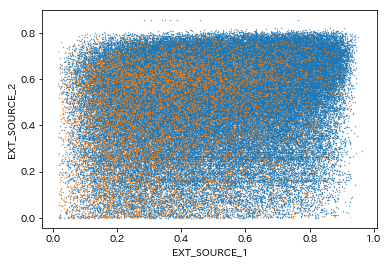

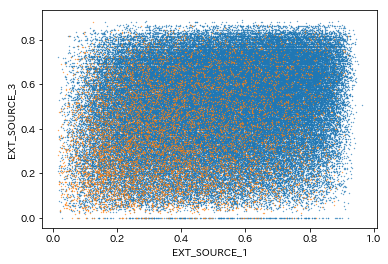

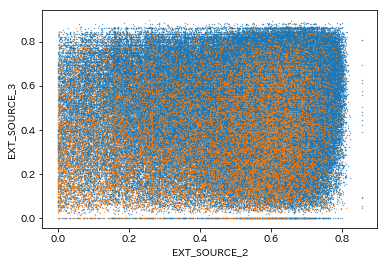

In [9]:
import itertools
POS = train.TARGET==1
NEG = train.TARGET==0
cols = [f'EXT_SOURCE_{i}' for i in range(1, 4)]
for i, j in itertools.combinations(cols, 2):
    plt.scatter(train.loc[NEG, i], train.loc[NEG, j], s=0.1)
    plt.scatter(train.loc[POS, i], train.loc[POS, j], s=0.1)
    plt.xlabel(i)
    plt.ylabel(j)
    plt.show()

## PREVIOUS

In [28]:
prev.replace({'XNA': np.nan, 'XAP': np.nan}, inplace=True)
prev.loc[:, prev.columns.str.startswith('DAYS_')] = prev.filter(regex='^DAYS_').replace({365243: np.nan})
prev = prev.sort_values(['SK_ID_CURR', 'DAYS_DECISION']).reset_index(drop=True)

In [3]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,Y,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
1,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,None,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
2,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
4,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0


### previous / missing

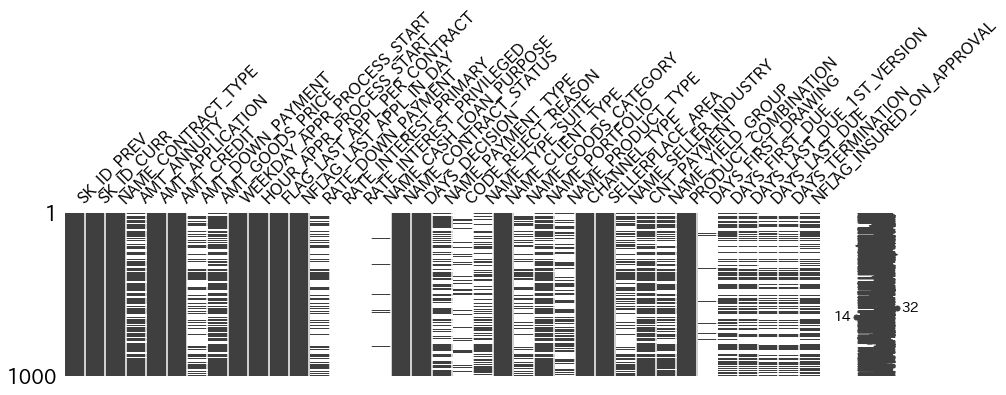

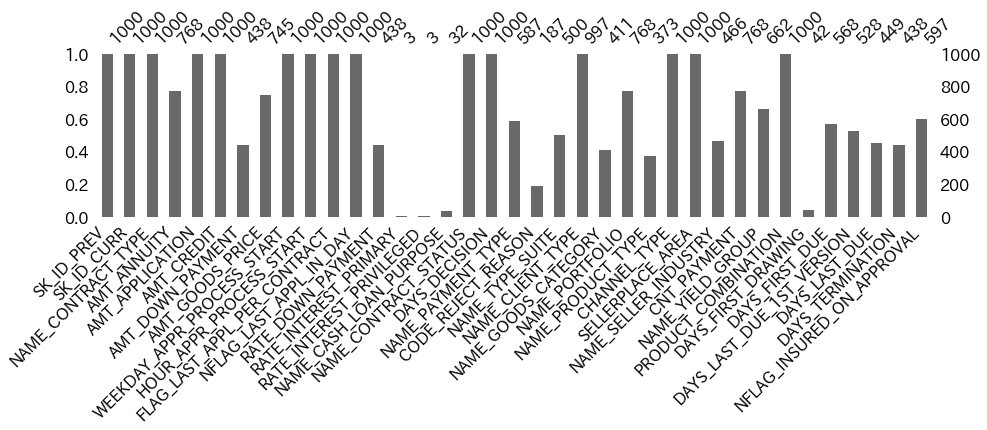

In [39]:
prev_sample = prev.sample(1000)
msno.matrix(prev_sample, figsize=(15, 3))
plt.show()
msno.bar(prev_sample, figsize=(15, 3))
plt.show()

In [66]:
X = pd.pivot_table(prev, index=['SELLERPLACE_AREA'], values=['SK_ID_PREV'], columns=['NAME_CONTRACT_STATUS'], aggfunc='count', fill_value=0)

In [70]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, learning_method='batch')

In [71]:
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [79]:
X.columns.names[1]

'NAME_CONTRACT_STATUS'

In [72]:
lda.transform(X)

array([[6.81045041e-02, 1.78229942e-02, 3.67274897e-01, 2.11672978e-01,
        3.35124627e-01],
       [1.81442378e-01, 2.38626685e-01, 1.46166946e-01, 2.84185435e-01,
        1.49578556e-01],
       [3.37104659e-01, 6.47619716e-01, 3.90202253e-05, 1.51975851e-02,
        3.90202412e-05],
       ...,
       [2.02668617e-02, 9.18936464e-01, 2.02356318e-02, 2.03223636e-02,
        2.02386787e-02],
       [1.01794059e-01, 5.92828542e-01, 1.01571975e-01, 1.02212132e-01,
        1.01593293e-01],
       [3.37913830e-02, 8.64840186e-01, 3.37375198e-02, 3.38881469e-02,
        3.37427646e-02]])

In [73]:
prev

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1369693,100001,Consumer loans,3951.000,24835.50,23787.0,2520.00,24835.50,FRIDAY,13,Y,1,0.104326,NaN,NaN,NaN,Approved,-1740,Cash through the bank,NaN,Family,Refreshed,Mobile,POS,NaN,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,NaN,-1709.0,-1499.0,-1619.0,-1612.0,0.0
1,1038818,100002,Consumer loans,9251.775,179055.00,179055.0,0.00,179055.00,SATURDAY,9,Y,1,0.000000,NaN,NaN,NaN,Approved,-606,NaN,NaN,None,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest,NaN,-565.0,125.0,-25.0,-17.0,0.0
2,2396755,100003,Consumer loans,6737.310,68809.50,68053.5,6885.00,68809.50,SATURDAY,15,Y,1,0.100061,NaN,NaN,NaN,Approved,-2341,Cash through the bank,NaN,Family,Refreshed,Consumer Electronics,POS,NaN,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,NaN,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,2636178,100003,Consumer loans,64567.665,337500.00,348637.5,0.00,337500.00,SUNDAY,17,Y,1,0.000000,NaN,NaN,NaN,Approved,-828,Cash through the bank,NaN,Family,Refreshed,Furniture,POS,NaN,Stone,1400,Furniture,6.0,middle,POS industry with interest,NaN,-797.0,-647.0,-647.0,-639.0,0.0
4,1810518,100003,Cash loans,98356.995,900000.00,1035882.0,NaN,900000.00,FRIDAY,12,Y,1,NaN,NaN,NaN,NaN,Approved,-746,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,low_normal,Cash X-Sell: low,NaN,-716.0,-386.0,-536.0,-527.0,1.0
5,1564014,100004,Consumer loans,5357.250,24282.00,20106.0,4860.00,24282.00,FRIDAY,5,Y,1,0.212008,NaN,NaN,NaN,Approved,-815,Cash through the bank,NaN,Unaccompanied,New,Mobile,POS,NaN,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,NaN,-784.0,-694.0,-724.0,-714.0,0.0
6,2495675,100005,Consumer loans,4813.200,44617.50,40153.5,4464.00,44617.50,THURSDAY,11,Y,1,0.108964,NaN,NaN,NaN,Approved,-757,Cash through the bank,NaN,None,New,Mobile,POS,NaN,Country-wide,37,Connectivity,12.0,high,POS mobile with interest,NaN,-706.0,-376.0,-466.0,-460.0,0.0
7,1857999,100005,Cash loans,NaN,0.00,0.0,NaN,NaN,FRIDAY,10,Y,1,NaN,NaN,NaN,NaN,Canceled,-315,NaN,NaN,None,Repeater,NaN,NaN,NaN,Credit and cash offices,-1,NaN,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2299329,100006,Consumer loans,2482.920,26912.34,24219.0,2693.34,26912.34,TUESDAY,15,Y,1,0.108994,NaN,NaN,NaN,Approved,-617,NaN,NaN,None,New,Construction Materials,POS,NaN,Stone,30,Construction,12.0,middle,POS industry with interest,NaN,-545.0,-215.0,-425.0,-416.0,0.0
9,1020698,100006,Cash loans,39954.510,454500.00,481495.5,NaN,454500.00,SATURDAY,12,Y,1,NaN,NaN,NaN,NaN,Approved,-438,Cash through the bank,NaN,None,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,18.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
prev.loc[:, prev.isnull().sum() == 0]

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,CHANNEL_TYPE,SELLERPLACE_AREA
0,1369693,100001,24835.50,FRIDAY,13,Y,1,Approved,-1740,Country-wide,23
1,1038818,100002,179055.00,SATURDAY,9,Y,1,Approved,-606,Stone,500
2,2396755,100003,68809.50,SATURDAY,15,Y,1,Approved,-2341,Country-wide,200
3,2636178,100003,337500.00,SUNDAY,17,Y,1,Approved,-828,Stone,1400
4,1810518,100003,900000.00,FRIDAY,12,Y,1,Approved,-746,Credit and cash offices,-1
5,1564014,100004,24282.00,FRIDAY,5,Y,1,Approved,-815,Regional / Local,30
6,2495675,100005,44617.50,THURSDAY,11,Y,1,Approved,-757,Country-wide,37
7,1857999,100005,0.00,FRIDAY,10,Y,1,Canceled,-315,Credit and cash offices,-1
8,2299329,100006,26912.34,TUESDAY,15,Y,1,Approved,-617,Stone,30
9,1020698,100006,454500.00,SATURDAY,12,Y,1,Approved,-438,Credit and cash offices,-1


In [133]:
prev_latest.var() < 1e-3

SK_ID_PREV                   False
SK_ID_CURR                   False
AMT_ANNUITY                  False
AMT_APPLICATION              False
AMT_CREDIT                   False
AMT_DOWN_PAYMENT             False
AMT_GOODS_PRICE              False
HOUR_APPR_PROCESS_START      False
NFLAG_LAST_APPL_IN_DAY       False
RATE_DOWN_PAYMENT            False
RATE_INTEREST_PRIMARY        False
RATE_INTEREST_PRIVILEGED     False
DAYS_DECISION                False
SELLERPLACE_AREA             False
CNT_PAYMENT                  False
DAYS_FIRST_DRAWING           False
DAYS_FIRST_DUE               False
DAYS_LAST_DUE_1ST_VERSION    False
DAYS_LAST_DUE                False
DAYS_TERMINATION             False
NFLAG_INSURED_ON_APPROVAL    False
dtype: bool

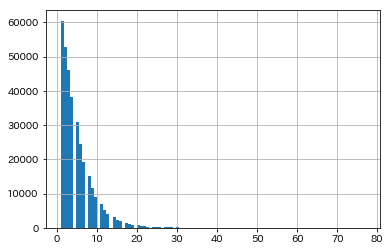

In [16]:
prev.groupby('SK_ID_CURR').SK_ID_PREV.count().hist(bins=100)
plt.show()

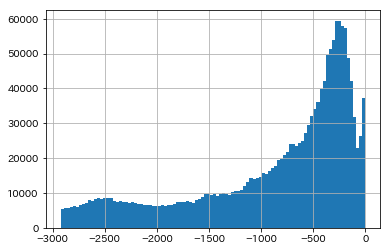

In [25]:
prev.DAYS_DECISION.hist(bins=100)

In [52]:
from tqdm import tqdm
tqdm.pandas()

In [56]:
prev.groupby('SK_ID_CURR').SELLERPLACE_AREA.value_counts()

SK_ID_CURR  SELLERPLACE_AREA
100001       23                  1
100002       500                 1
100003      -1                   1
             200                 1
             1400                1
100004       30                  1
100005      -1                   1
             37                  1
100006      -1                   7
             30                  1
             8025                1
100007      -1                   2
             1200                2
             4                   1
             53                  1
100008       110                 2
            -1                   1
             50                  1
             96                  1
100009       164                 3
             190                 2
             18                  1
             300                 1
100010       8636                1
100011      -1                   2
             0                   1
             1371                1
100012      -1            

In [54]:
prev.groupby('SK_ID_CURR').SELLERPLACE_AREA.apply(lambda x: x.value_counts().index[0])

SK_ID_CURR
100001      23
100002     500
100003    1400
100004      30
100005      37
100006      -1
100007      -1
100008     110
100009     164
100010    8636
100011      -1
100012      -1
100013      -1
100014      30
100015     110
100016     200
100017    2500
100018    1200
100019    1000
100020     550
100021     200
100022      -1
100023       4
100025      -1
100026      -1
100027       5
100028    3500
100029      18
100030      30
100032     246
          ... 
456225      -1
456226      -1
456227      -1
456228      -1
456230    2566
456231      -1
456232     150
456233     150
456234      25
456235     200
456236      -1
456237      -1
456238     100
456239      40
456240      -1
456241      -1
456242     500
456243     150
456244      -1
456245      21
456246      30
456247      30
456248      -1
456249      69
456250      -1
456251      30
456252     190
456253      22
456254      63
456255      -1
Name: SELLERPLACE_AREA, Length: 338857, dtype: int64

In [26]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,Y,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
1,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,None,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
2,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
4,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0


In [22]:
inst

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


In [20]:
prev.merge(inst, on='SK_ID_PREV', how='left')

,SK_ID_PREV,SK_ID_CURR_x,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,Y,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0,100001.0,1.0,1.0,-1709.0,-1715.0,3951.000,3951.000
1,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,Y,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0,100001.0,1.0,2.0,-1679.0,-1715.0,3951.000,3951.000
2,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,Y,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0,100001.0,2.0,4.0,-1619.0,-1628.0,17397.900,17397.900
3,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,Y,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0,100001.0,1.0,3.0,-1649.0,-1660.0,3951.000,3951.000
4,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,None,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,100002.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775
5,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,None,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,100002.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775
6,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,None,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,100002.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745
7,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,None,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,100002.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775
8,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,None,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,100002.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775
9,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,None,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,100002.0,1.0,13.0,-205.0,-224.0,9

In [53]:
pos = pos.sort_values(['SK_ID_CURR', 'MONTHS_BALANCE']).reset_index(drop=True)

In [56]:
pos.groupby('SK_ID_CURR').tail(1).NAME_CONTRACT_STATUS.value_counts()

Completed                188746
Active                   147403
Signed                      810
Returned to the store       180
Demand                       67
Approved                     33
Amortized debt               13
Name: NAME_CONTRACT_STATUS, dtype: int64

In [46]:
pos[pos.SK_ID_CURR==100001].sort_values(['SK_ID_PREV', 'MONTHS_BALANCE']).groupby('SKO_ID_CURR').apply(lambda x:)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
7167007,1369693,100001,-57,4.0,4.0,Active,0,0
8789081,1369693,100001,-56,4.0,3.0,Active,0,0
7823681,1369693,100001,-55,4.0,2.0,Active,0,0
4704415,1369693,100001,-54,4.0,1.0,Active,0,0
2197888,1369693,100001,-53,4.0,0.0,Completed,0,0
1261679,1851984,100001,-96,4.0,2.0,Active,0,0
1891462,1851984,100001,-95,4.0,1.0,Active,7,7
8531326,1851984,100001,-94,4.0,0.0,Active,0,0
4928574,1851984,100001,-93,4.0,0.0,Completed,0,0


In [63]:
credit = credit.sort_values(['SK_ID_CURR', 'MONTHS_BALANCE']).reset_index(drop=True)
credit.head(30)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1489396,100006,-6,0.000,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
1,1489396,100006,-5,0.000,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
2,1489396,100006,-4,0.000,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3,1489396,100006,-3,0.000,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
4,1489396,100006,-2,0.000,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
5,1489396,100006,-1,0.000,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
6,1843384,100011,-75,189000.000,180000,180000.0,180000.0,0.0,0.0,NaN,0.0,0.0,180000.000,189000.000,189000.000,4.0,4,0.0,0.0,NaN,Active,0,0
7,1843384,100011,-74,184568.850,180000,0.0,0.0,0.0,0.0,9000.0,9000.0,9000.0,180000.000,184568.850,184568.850,0.0,0,0.0,0.0,1.0,Active,0,0
8,1843384,100011,-73,181044.540,180000,0.0,0.0,0.0,0.0,9000.0,9000.0,9000.0,175568.850,181044.540,181044.540,0.0,0,0.0,0.0,2.0,Active,0,0
9,1843384,100011,-72,177544.350,180000,0.0,0.0,0.0,0.0,9000.0,9000.0,9000.0,172044.540,177544.350,177544.350,0.0,0,0.0,0.0,3.0,Active,0,0


In [138]:
inst = pd.read_feather('../input/installments_payments.ftr')
inst = inst.sort_values(['SK_ID_CURR', 'DAYS_INSTALMENT']).reset_index(drop=True)

In [ ]:
inst.replace({'XAO'})

In [142]:
inst.groupby('SK_ID_CURR').last()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_CURR,,,,,,,
100001,1369693,2.0,4,-1619.0,-1628.0,17397.900,17397.900
100002,1038818,2.0,19,-25.0,-49.0,53093.745,53093.745
100003,1810518,2.0,7,-536.0,-544.0,560835.360,560835.360
100004,1564014,2.0,3,-724.0,-727.0,10573.965,10573.965
100005,2495675,2.0,9,-466.0,-470.0,17656.245,17656.245
100006,2190416,1.0,10,-11.0,-12.0,29027.520,29027.520
100007,1692033,1.0,12,-14.0,-14.0,16037.640,16037.640
100008,2218188,1.0,10,-69.0,-82.0,17876.115,17876.115
100009,2797899,1.0,1,-43.0,-58.0,10418.670,10418.670


In [143]:
df = pd.read_feather('../working/prev_latest_train.ftr')

In [144]:
df.isnull().sum()

prev_NAME_CONTRACT_TYPE_latest              16454
prev_AMT_ANNUITY_latest                     16871
prev_AMT_APPLICATION_latest                 16454
prev_AMT_CREDIT_latest                      16454
prev_AMT_DOWN_PAYMENT_latest                33906
prev_AMT_GOODS_PRICE_latest                 17429
prev_WEEKDAY_APPR_PROCESS_START_latest          0
prev_HOUR_APPR_PROCESS_START_latest         16454
prev_FLAG_LAST_APPL_PER_CONTRACT_latest         0
prev_NFLAG_LAST_APPL_IN_DAY_latest              0
prev_RATE_DOWN_PAYMENT_latest               33906
prev_RATE_INTEREST_PRIMARY_latest          302902
prev_RATE_INTEREST_PRIVILEGED_latest       302902
prev_NAME_CASH_LOAN_PURPOSE_latest              0
prev_NAME_CONTRACT_STATUS_latest                0
prev_DAYS_DECISION_latest                   16454
prev_NAME_PAYMENT_TYPE_latest                   0
prev_CODE_REJECT_REASON_latest                  0
prev_NAME_TYPE_SUITE_latest                     0
prev_NAME_CLIENT_TYPE_latest                    0


In [146]:
df

,prev_NAME_CONTRACT_TYPE_latest,prev_AMT_ANNUITY_latest,prev_AMT_APPLICATION_latest,prev_AMT_CREDIT_latest,prev_AMT_DOWN_PAYMENT_latest,prev_AMT_GOODS_PRICE_latest,prev_WEEKDAY_APPR_PROCESS_START_latest,prev_HOUR_APPR_PROCESS_START_latest,prev_FLAG_LAST_APPL_PER_CONTRACT_latest,prev_NFLAG_LAST_APPL_IN_DAY_latest,prev_RATE_DOWN_PAYMENT_latest,prev_RATE_INTEREST_PRIMARY_latest,prev_RATE_INTEREST_PRIVILEGED_latest,prev_NAME_CASH_LOAN_PURPOSE_latest,prev_NAME_CONTRACT_STATUS_latest,prev_DAYS_DECISION_latest,prev_NAME_PAYMENT_TYPE_latest,prev_CODE_REJECT_REASON_latest,prev_NAME_TYPE_SUITE_latest,prev_NAME_CLIENT_TYPE_latest,prev_NAME_GOODS_CATEGORY_latest,prev_NAME_PORTFOLIO_latest,prev_NAME_PRODUCT_TYPE_latest,prev_CHANNEL_TYPE_latest,prev_SELLERPLACE_AREA_latest,prev_NAME_SELLER_INDUSTRY_latest,prev_CNT_PAYMENT_latest,prev_NAME_YIELD_GROUP_latest,prev_PRODUCT_COMBINATION_latest,prev_DAYS_FIRST_DRAWING_latest,prev_DAYS_FIRST_DUE_latest,prev_DAYS_LAST_DUE_1ST_VERSION_latest,prev_DAYS_LAST_DUE_latest,prev_DAYS_TERMINATION_latest,prev_NFLAG_INSURED_ON_APPROVAL_latest
0,Consumer loans,9.132679,12.095454,12.095454,0.000000,12.095454,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,nan,Approved,-606.0,nan,nan,None,New,Vehicles,POS,nan,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,NaN,-565.0,125.0,-25.0,-17.0,0.0
1,Cash loans,11.496369,13.710151,13.850765,0.000000,13.710151,FRIDAY,12.0,Y,1.0,0.000000,NaN,NaN,nan,Approved,-746.0,Cash through the bank,nan,Unaccompanied,Repeater,Furniture,Cash,x-sell,Credit and cash offices,-1.0,Furniture,12.0,low_normal,Cash X-Sell: low,NaN,-716.0,-386.0,-536.0,-527.0,1.0
2,Consumer loans,8.586393,10.097532,9.908823,8.488999,10.097532,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,nan,Approved,-815.0,Cash through the bank,nan,Unaccompanied,New,Mobile,POS,nan,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,NaN,-784.0,-694.0,-724.0,-714.0,0.0
3,Cash loans,10.395042,13.442272,13.717474,11.112269,13.442272,THURSDAY,15.0,Y,1.0,0.217830,NaN,NaN,nan,Refused,-181.0,Cash through the bank,LIMIT,Unaccompanied,Repeater,Audio/Video,Cash,x-sell,Credit and cash offices,-1.0,Consumer electronics,48.0,low_normal,Cash X-Sell: low,NaN,-151.0,1259.0,-151.0,-143.0,0.0
4,Cash loans,9.682756,12.419170,12.521939,8.041091,12.419170,MONDAY,11.0,Y,1.0,0.100143,NaN,NaN,nan,Approved,-374.0,Cash through the bank,nan,None,Repeater,Audio/Video,Cash,x-sell,Credit and cash offices,-1.0,Consumer electronics,24.0,middle,Cash X-Sell: middle,NaN,-344.0,346.0,-354.0,-347.0,1.0
5,Cash loans,9.791820,0.000000,0.000000,0.000000,11.999045,FRIDAY,18.0,Y,1.0,0.000000,NaN,NaN,nan,Canceled,-82.0,Cash through the bank,nan,None,Repeater,Consumer Electronics,POS,x-sell,Credit and cash offices,-1.0,Consumer electronics,10.0,low_normal,Cash,NaN,-339.0,-69.0,-69.0,-66.0,0.0
6,Consumer loans,9.251451,11.470456,11.392260,9.573489,11.470456,WEDNESDAY,17.0,Y,1.0,0.152009,NaN,NaN,nan,Approved,-74.0,Cash through the bank,nan,None,Repeater,Consumer Electronics,POS,nan,Regional / Local,300.0,Consumer electronics,10.0,middle,POS household with interest,NaN,-43.0,227.0,-124.0,-119.0,0.0
7,Consumer loans,10.220646,12.418006,12.471555,0.000000,12.418006,TUESDAY,16.0,Y,1.0,0.000000,NaN,NaN,nan,Approved,-1070.0,Cash through the bank,nan,Family,New,Furniture,POS,nan,Stone,8636.0,Furniture,10.0,low_action,POS industry without interest,NaN,-1039.0,-769.0,-769.0,-762.0,0.0
8,Cash loans,10.351254,0.000000,0.000000,0.000000,0.000000,WEDNESDAY,9.0,Y,1.0,0.000000,NaN,NaN,nan,Refused,-1162.0,Cash through the bank,LIMIT,Unaccompanied,Repeater,Computers,Cash,walk-in,Credit and cash offices,-1.0,Consumer electronics,30.0,low_action,Cash,-2277.0,-1159.0,-289.0,-289.0,-283.0,1.0
9,Cash loans,9.157293,0.000000,0.000000,0.000000,11.407576,TUESDAY,13.0,Y,1.0,0.000000,NaN,NaN,nan,Canceled,-107.0,Cash through the bank,nan,None,Repeater,Audio/Video,Cash,x-sell,Credit and cash offices,-1.0,Connectivity,18.0,high,Cash,NaN,-477.0,33.0,-147.0,-144.0,1.0


In [67]:
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
inst_sample = inst.g
plt.scatter(inst.AMT_INSTALMENT, inst.AMT_PAYMENT)

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/Users/amane/.pyenv/versions/3.6.1/envs/compe/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/amane/.pyenv/versions/3.6.1/envs/compe/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/amane/.pyenv/versions/3.6.1/envs/compe/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/amane/.pyenv/versions/3.6.1/envs/compe/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/amane/.pyenv/versions/3.6.1/envs/compe/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/amane/.pyenv/versions/3.6.1/envs/comp

/Users/amane/.pyenv/versions/3.6.1/envs/compe/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/amane/.pyenv/versions/3.6.1/envs/compe/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

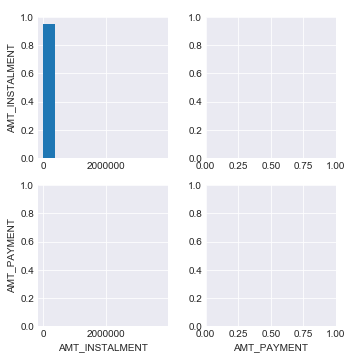

In [70]:
sns.pairplot(inst[['AMT_INSTALMENT', 'AMT_PAYMENT']])

In [105]:
train_idx = train[['SK_ID_CURR']]
test_idx = test[['SK_ID_CURR']]

In [104]:
train_idx

,SK_ID_CURR
0,100002
1,100003
2,100004
3,100006
4,100007
5,100008
6,100009
7,100010
8,100011
9,100012


In [88]:
prev_latest = prev.groupby('SK_ID_CURR').tail(1)

In [108]:
prev.query('NAME_CONTRACT_STATUS=="Approved"').groupby('SK_ID_CURR').tail(1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1369693,100001,Consumer loans,3951.000,24835.500,23787.000,2520.000,24835.500,FRIDAY,13,Y,1,0.104326,NaN,NaN,NaN,Approved,-1740,Cash through the bank,NaN,Family,Refreshed,Mobile,POS,NaN,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,NaN,-1709.0,-1499.0,-1619.0,-1612.0,0.0
1,1038818,100002,Consumer loans,9251.775,179055.000,179055.000,0.000,179055.000,SATURDAY,9,Y,1,0.000000,NaN,NaN,NaN,Approved,-606,NaN,NaN,None,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest,NaN,-565.0,125.0,-25.0,-17.0,0.0
4,1810518,100003,Cash loans,98356.995,900000.000,1035882.000,NaN,900000.000,FRIDAY,12,Y,1,NaN,NaN,NaN,NaN,Approved,-746,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,low_normal,Cash X-Sell: low,NaN,-716.0,-386.0,-536.0,-527.0,1.0
5,1564014,100004,Consumer loans,5357.250,24282.000,20106.000,4860.000,24282.000,FRIDAY,5,Y,1,0.212008,NaN,NaN,NaN,Approved,-815,Cash through the bank,NaN,Unaccompanied,New,Mobile,POS,NaN,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,NaN,-784.0,-694.0,-724.0,-714.0,0.0
6,2495675,100005,Consumer loans,4813.200,44617.500,40153.500,4464.000,44617.500,THURSDAY,11,Y,1,0.108964,NaN,NaN,NaN,Approved,-757,Cash through the bank,NaN,None,New,Mobile,POS,NaN,Country-wide,37,Connectivity,12.0,high,POS mobile with interest,NaN,-706.0,-376.0,-466.0,-460.0,0.0
13,1489396,100006,Revolving loans,13500.000,270000.000,270000.000,NaN,270000.000,THURSDAY,15,Y,1,NaN,NaN,NaN,NaN,Approved,-181,NaN,NaN,Unaccompanied,Repeater,NaN,Cards,x-sell,Credit and cash offices,-1,NaN,0.0,NaN,Card X-Sell,NaN,NaN,NaN,NaN,NaN,0.0
22,1692033,100007,Cash loans,16037.640,247500.000,274288.500,NaN,247500.000,MONDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,-374,Cash through the bank,NaN,None,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,24.0,middle,Cash X-Sell: middle,NaN,-344.0,346.0,NaN,NaN,1.0
26,2218188,100008,Consumer loans,17885.835,162598.500,162598.500,0.000,162598.500,THURSDAY,10,Y,1,0.000000,NaN,NaN,NaN,Approved,-370,Cash through the bank,NaN,None,Repeater,Consumer Electronics,POS,NaN,Country-wide,110,Consumer electronics,10.0,low_normal,POS household with interest,NaN,-339.0,-69.0,-69.0,-66.0,0.0
34,2797899,100009,Consumer loans,10418.670,95841.000,88632.000,14377.500,95841.000,WEDNESDAY,17,Y,1,0.152009,NaN,NaN,NaN,Approved,-74,Cash through the bank,NaN,None,Repeater,Consumer Electronics,POS,NaN,Regional / Local,300,Consumer electronics,10.0,middle,POS household with interest,NaN,-43.0,227.0,NaN,NaN,0.0
35,2349489,100010,Consumer loans,27463.410,247212.000,260811.000,0.000,247212.000,TUESDAY,16,Y,1,0.000000,NaN,NaN,NaN,Approved,-1070,Cash through the bank,NaN,Family,New,Furniture,POS,NaN,Stone,8636,Furniture,10.0,low_action,POS industry without interest,NaN,-1039.0,-769.0,-769.0,-762.0,0.0


In [97]:
prev_merged.SK_ID_PREV

0          1369693
1          1038818
2          2396755
3          2636178
4          1810518
5          1564014
6          2495675
7          1857999
8          2299329
9          1020698
10         2190416
11         2078043
12         2827850
13         1489396
14         1243599
15         2545789
16         1697039
17         2119973
18         2462742
19         1940724
20         2730157
21         2001242
22         1692033
23         1186888
24         1907290
25         2613879
26         2218188
27         1757431
28         1112703
29         1193310
            ...   
1670184    2390857
1670185    1522534
1670186    1395578
1670187    1826280
1670188    1136073
1670189    2743495
1670190    2660508
1670191    2669123
1670192    1922117
1670193    1740566
1670194    1511244
1670195    2626069
1670196    1794451
1670197    1482581
1670198    2624169
1670199    1081068
1670200    2248017
1670201    1503599
1670202    1668235
1670203    1686207
1670204    1792910
1670205    2

In [131]:
prev.drop(''query('NAME_CONTRACT_STATUS=="Approved"').groupby('SK_ID_CURR').last()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,1369693,Consumer loans,3951.000,24835.500,23787.000,2520.000,24835.500,FRIDAY,13,Y,1,0.104326,NaN,NaN,NaN,Approved,-1740,Cash through the bank,NaN,Family,Refreshed,Mobile,POS,NaN,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,NaN,-1709.0,-1499.0,-1619.0,-1612.0,0.0
100002,1038818,Consumer loans,9251.775,179055.000,179055.000,0.000,179055.000,SATURDAY,9,Y,1,0.000000,NaN,NaN,NaN,Approved,-606,NaN,NaN,None,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest,NaN,-565.0,125.0,-25.0,-17.0,0.0
100003,1810518,Cash loans,98356.995,900000.000,1035882.000,0.000,900000.000,FRIDAY,12,Y,1,0.000000,NaN,NaN,NaN,Approved,-746,Cash through the bank,NaN,Unaccompanied,Repeater,Furniture,Cash,x-sell,Credit and cash offices,-1,Furniture,12.0,low_normal,Cash X-Sell: low,NaN,-716.0,-386.0,-536.0,-527.0,1.0
100004,1564014,Consumer loans,5357.250,24282.000,20106.000,4860.000,24282.000,FRIDAY,5,Y,1,0.212008,NaN,NaN,NaN,Approved,-815,Cash through the bank,NaN,Unaccompanied,New,Mobile,POS,NaN,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,NaN,-784.0,-694.0,-724.0,-714.0,0.0
100005,2495675,Consumer loans,4813.200,44617.500,40153.500,4464.000,44617.500,THURSDAY,11,Y,1,0.108964,NaN,NaN,NaN,Approved,-757,Cash through the bank,NaN,None,New,Mobile,POS,NaN,Country-wide,37,Connectivity,12.0,high,POS mobile with interest,NaN,-706.0,-376.0,-466.0,-460.0,0.0
100006,1489396,Revolving loans,13500.000,270000.000,270000.000,66987.000,270000.000,THURSDAY,15,Y,1,0.217830,NaN,NaN,NaN,Approved,-181,Cash through the bank,NaN,Unaccompanied,Repeater,Audio/Video,Cards,x-sell,Credit and cash offices,-1,Consumer electronics,0.0,low_normal,Card X-Sell,NaN,-151.0,1259.0,-151.0,-143.0,0.0
100007,1692033,Cash loans,16037.640,247500.000,274288.500,3105.000,247500.000,MONDAY,11,Y,1,0.100143,NaN,NaN,NaN,Approved,-374,Cash through the bank,NaN,None,Repeater,Audio/Video,Cash,x-sell,Credit and cash offices,-1,Consumer electronics,24.0,middle,Cash X-Sell: middle,NaN,-344.0,346.0,-354.0,-347.0,1.0
100008,2218188,Consumer loans,17885.835,162598.500,162598.500,0.000,162598.500,THURSDAY,10,Y,1,0.000000,NaN,NaN,NaN,Approved,-370,Cash through the bank,NaN,None,Repeater,Consumer Electronics,POS,x-sell,Country-wide,110,Consumer electronics,10.0,low_normal,POS household with interest,NaN,-339.0,-69.0,-69.0,-66.0,0.0
100009,2797899,Consumer loans,10418.670,95841.000,88632.000,14377.500,95841.000,WEDNESDAY,17,Y,1,0.152009,NaN,NaN,NaN,Approved,-74,Cash through the bank,NaN,None,Repeater,Consumer Electronics,POS,NaN,Regional / Local,300,Consumer electronics,10.0,middle,POS household with interest,NaN,-43.0,227.0,-124.0,-119.0,0.0


In [126]:
df = pd.read_feather('../working/pos_latest_test.ftr')

In [127]:
pos.

,pos_MONTHS_BALANCE_latest,pos_CNT_INSTALMENT_latest,pos_CNT_INSTALMENT_FUTURE_latest,pos_NAME_CONTRACT_STATUS_latest,pos_SK_DPD_latest,pos_SK_DPD_DEF_latest
0,-53.0,4.0,0.0,Completed,0.000000,0.000000
1,-15.0,9.0,0.0,Completed,0.000000,0.000000
2,-3.0,6.0,0.0,Completed,0.000000,0.000000
3,-20.0,5.0,0.0,Completed,0.000000,0.000000
4,-15.0,12.0,0.0,Completed,0.000000,0.000000
5,-21.0,1.0,0.0,Completed,0.000000,0.000000
6,-2.0,9.0,8.0,Active,0.000000,0.000000
7,-34.0,5.0,0.0,Completed,0.000000,0.000000
8,-1.0,45.0,36.0,Active,0.000000,0.000000
9,-1.0,10.0,7.0,Active,0.000000,0.000000


In [112]:
pos = pd.read_feather('../input/POS_CASH_balance.ftr')

In [114]:
pos = pos.sort_values(['SK_ID_CURR', 'MONTHS_BALANCE']).reset_index(drop=True)
pos.loc[:, pos.columns.str.startswith('SK_DPD')] = np.log1p(pos.filter(regex='^SK_DPD'))

In [120]:
pos.groupby('SK_ID_CURR').last()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_CURR,,,,,,,
100001,1369693,-53,4.0,0.0,Completed,0.0,0.0
100002,1038818,-1,24.0,6.0,Active,0.0,0.0
100003,1810518,-18,7.0,0.0,Completed,0.0,0.0
100004,1564014,-24,3.0,0.0,Completed,0.0,0.0
100005,2495675,-15,9.0,0.0,Completed,0.0,0.0
100006,2190416,-1,12.0,3.0,Active,0.0,0.0
100007,1692033,-1,24.0,13.0,Active,0.0,0.0
100008,2218188,-2,10.0,0.0,Completed,0.0,0.0
100009,2797899,-1,10.0,9.0,Active,0.0,0.0


In [115]:
pos.groupby('SK_ID_CURR').tail(1).drop('SK_ID_PREV', axis=1)

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
8,100001,-53,4.0,0.0,Completed,0.0,0.0
27,100002,-1,24.0,6.0,Active,0.0,0.0
55,100003,-18,7.0,0.0,Completed,0.0,0.0
59,100004,-24,3.0,0.0,Completed,0.0,0.0
70,100005,-15,9.0,0.0,Completed,0.0,0.0
91,100006,-1,12.0,3.0,Active,0.0,0.0
157,100007,-1,24.0,13.0,Active,0.0,0.0
240,100008,-2,10.0,0.0,Completed,0.0,0.0
304,100009,-1,10.0,9.0,Active,0.0,0.0
315,100010,-25,10.0,0.0,Completed,0.0,0.0


In [117]:
pos.groupby('SK_ID_CURR', as_index=True).tail(1)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
8,1369693,100001,-53,4.0,0.0,Completed,0.0,0.0
27,1038818,100002,-1,24.0,6.0,Active,0.0,0.0
55,1810518,100003,-18,7.0,0.0,Completed,0.0,0.0
59,1564014,100004,-24,3.0,0.0,Completed,0.0,0.0
70,2495675,100005,-15,9.0,0.0,Completed,0.0,0.0
91,2190416,100006,-1,12.0,3.0,Active,0.0,0.0
157,1692033,100007,-1,24.0,13.0,Active,0.0,0.0
240,2218188,100008,-2,10.0,0.0,Completed,0.0,0.0
304,2797899,100009,-1,10.0,9.0,Active,0.0,0.0
315,2349489,100010,-25,10.0,0.0,Completed,0.0,0.0


In [134]:
credit = pd.read_feather('../input/credit_card_balance.ftr')

In [136]:
credit.sort_values(['SK_ID_CURR', 'MONTHS_BALANCE'])

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1636141,1489396,100006,-6,0.000,270000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
655566,1489396,100006,-5,0.000,270000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
1399895,1489396,100006,-4,0.000,270000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
1347528,1489396,100006,-3,0.000,270000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
520387,1489396,100006,-2,0.000,270000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
584804,1489396,100006,-1,0.000,270000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3131464,1843384,100011,-75,189000.000,180000,180000.0,180000.0,0.0,0.0,NaN,0.0,0.000,180000.000,189000.000,189000.000,4.0,4,0.0,0.0,NaN,Active,0,0
2447092,1843384,100011,-74,184568.850,180000,0.0,0.0,0.0,0.0,9000.000,9000.0,9000.000,180000.000,184568.850,184568.850,0.0,0,0.0,0.0,1.0,Active,0,0
2353190,1843384,100011,-73,181044.540,180000,0.0,0.0,0.0,0.0,9000.000,9000.0,9000.000,175568.850,181044.540,181044.540,0.0,0,0.0,0.0,2.0,Active,0,0
1086495,1843384,100011,-72,177544.350,180000,0.0,0.0,0.0,0.0,9000.000,9000.0,9000.000,172044.540,177544.350,177544.350,0.0,0,0.0,0.0,3.0,Active,0,0


In [ ]:
inst